In [1]:
import pandas as pd
import io
df = pd.read_csv('C://Users//Ruhan Siddiqui//Downloads//494724_1261242_bundle_archive//covid_19_data.csv',parse_dates=['Last Update'])
print(df)

         SNo ObservationDate      Province/State  Country/Region  \
0          1      01/22/2020               Anhui  Mainland China   
1          2      01/22/2020             Beijing  Mainland China   
2          3      01/22/2020           Chongqing  Mainland China   
3          4      01/22/2020              Fujian  Mainland China   
4          5      01/22/2020               Gansu  Mainland China   
...      ...             ...                 ...             ...   
45174  45175      06/18/2020           Zacatecas          Mexico   
45175  45176      06/18/2020  Zakarpattia Oblast         Ukraine   
45176  45177      06/18/2020   Zaporizhia Oblast         Ukraine   
45177  45178      06/18/2020            Zhejiang  Mainland China   
45178  45179      06/18/2020     Zhytomyr Oblast         Ukraine   

              Last Update  Confirmed  Deaths  Recovered  
0     2020-01-22 17:00:00        1.0     0.0        0.0  
1     2020-01-22 17:00:00       14.0     0.0        0.0  
2     202

In [2]:
from matplotlib import pyplot as plt

from statsmodels.tsa.ar_model import AR

import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [6]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_date = df.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
#df = df.drop(df.columns['SNo', 'Province/State'], axis=1,inplace=True)

In [7]:
date_confirmed = df_date[['Date', 'Confirmed']]
date_death = df_date[['Date', 'Deaths']]
date_recovered = df_date[['Date', 'Recovered']]
print(date_death)

           Date    Deaths
0    01/22/2020      17.0
1    01/23/2020      18.0
2    01/24/2020      26.0
3    01/25/2020      42.0
4    01/26/2020      56.0
..          ...       ...
144  06/14/2020  433066.0
145  06/15/2020  436899.0
146  06/16/2020  443685.0
147  06/17/2020  448959.0
148  06/18/2020  453987.0

[149 rows x 2 columns]


In [8]:
for index, row in date_confirmed.iterrows():
  if row['Confirmed'] is None:
    row['Confirmed'] = 0.0

for index, row in date_death.iterrows():
  if row['Deaths'] is None:
    row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
  if row['Recovered'] is None:
    row['Recovered'] = 0.0

[1.03941263e+03 7.52620389e+02 1.18015366e+03 1.86168923e+03
 2.70504896e+03 3.63006476e+03 7.84464436e+03 6.76574267e+03
 9.99293332e+03 1.14237240e+04 1.38712414e+04 2.13871507e+04
 2.24469725e+04 2.75921777e+04 3.11926735e+04 3.38793415e+04
 3.77361738e+04 4.10665280e+04 4.15547895e+04 4.62298060e+04
 4.65731166e+04 4.60992912e+04 7.55322514e+04 7.24160877e+04
 7.19262380e+04 7.33748227e+04 7.50105502e+04 7.74131470e+04
 7.58509487e+04 7.75860713e+04 7.69210961e+04 8.02488094e+04
 7.82802293e+04 9.13000501e+04 7.69949174e+04 7.89580136e+04
 8.43174543e+04 8.54465742e+04 8.76750257e+04 8.97453106e+04
 9.19891545e+04 9.53395088e+04 9.80465035e+04 9.94041699e+04
 1.05048826e+05 1.13336935e+05 1.11999613e+05 1.16316239e+05
 1.23164352e+05 1.32823369e+05 1.31288474e+05 1.59318131e+05
 1.66727671e+05 1.77672023e+05 1.94911460e+05 2.11939120e+05
 2.31231274e+05 2.67622199e+05 2.98711077e+05 3.34837735e+05
 3.68532418e+05 4.12055484e+05 4.64666599e+05 5.08961530e+05
 5.85916957e+05 6.533611

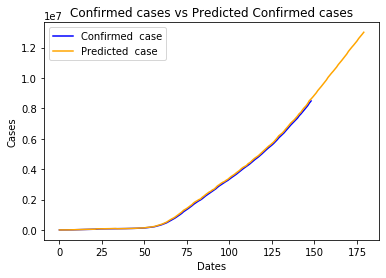

In [10]:
#SARIMA model
model_sarima_confirmed = SARIMAX(np.asanyarray(date_confirmed['Confirmed']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_confirmed = model_sarima_confirmed.fit(disp=False, enforce_stationarity=False)
predict_sarima_confirmed = model_fit_sarima_confirmed.predict(1, len(date_confirmed)+31)
print(predict_sarima_confirmed)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed['Confirmed'], label='Confirmed  case', color='blue')
plt.plot(predict_sarima_confirmed, label='Predicted  case', color='orange')
#plt.plot(predict_sarima_confirmed[:len(predict_sarima_confirmed)-31], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

[2.59894774e+01 2.03685103e+01 3.07442443e+01 5.15452476e+01
 6.55583860e+01 9.79247799e+01 1.60633174e+02 1.40628840e+02
 1.92521919e+02 2.39656172e+02 2.88592295e+02 4.32867078e+02
 4.68846804e+02 5.48281533e+02 6.26992018e+02 6.87996931e+02
 7.95865274e+02 8.97514299e+02 9.50128119e+02 1.12565669e+03
 1.19849018e+03 1.13103628e+03 1.62040267e+03 1.62612322e+03
 1.78716452e+03 1.86755713e+03 1.95677863e+03 2.13730506e+03
 2.23043103e+03 2.37520837e+03 2.26647069e+03 2.64009929e+03
 2.42808785e+03 2.93846914e+03 2.75547258e+03 2.83263172e+03
 2.84783598e+03 2.93543452e+03 3.04456664e+03 3.05247199e+03
 3.18598856e+03 3.15896472e+03 3.48383943e+03 3.31632311e+03
 3.63805414e+03 3.66766633e+03 3.98112001e+03 4.14885965e+03
 4.48295145e+03 4.90956730e+03 4.81921848e+03 5.96727667e+03
 6.15318462e+03 6.92032180e+03 7.72486182e+03 8.49450171e+03
 9.42003295e+03 1.08530659e+04 1.24057212e+04 1.43477061e+04
 1.60091986e+04 1.78250219e+04 2.06892353e+04 2.30884313e+04
 2.63412900e+04 2.984682

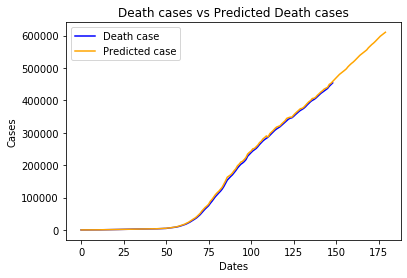

In [11]:
model_sarima_death = SARIMAX(np.asanyarray(date_death['Deaths']),  order=(1,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_death = model_sarima_death.fit(disp=False, enforce_stationarity=False)
predict_sarima_death = model_fit_sarima_death.predict(1, len(date_death)+31)
print(predict_sarima_death)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_death['Deaths'], label='Death case', color='blue')
plt.plot(predict_sarima_death, label='Predicted case', color='orange')
#plt.plot(predict_sarima_death[:len(predict_sarima_death)-31], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

[4.76184283e+01 3.66804902e+01 3.75781570e+01 3.95787879e+01
 5.69451850e+01 6.57056099e+01 1.29355768e+02 1.41804001e+02
 1.49349060e+02 2.48063460e+02 3.09246122e+02 4.72000161e+02
 7.52584652e+02 1.03555631e+03 1.35606036e+03 1.78717407e+03
 2.43582444e+03 3.13632626e+03 3.80166410e+03 4.55574055e+03
 5.33526565e+03 5.64671272e+03 7.13098450e+03 9.49306236e+03
 1.07017986e+04 1.21459834e+04 1.40559860e+04 1.59374659e+04
 1.77116405e+04 1.99808408e+04 1.99003880e+04 2.55391810e+04
 2.49039086e+04 2.65075180e+04 3.02003522e+04 3.26870623e+04
 3.58432945e+04 3.97331672e+04 4.27767908e+04 4.56162753e+04
 4.83899726e+04 5.07714645e+04 5.38706143e+04 5.63745454e+04
 5.76986195e+04 6.11285737e+04 6.37658200e+04 6.42202735e+04
 6.62307928e+04 6.95731502e+04 7.01691963e+04 7.20045268e+04
 7.50964591e+04 7.77514904e+04 8.32933693e+04 8.09632506e+04
 8.60018793e+04 8.80845328e+04 8.96839589e+04 9.56054947e+04
 1.02831390e+05 1.04960866e+05 1.12970737e+05 1.19618039e+05
 1.29039894e+05 1.391868

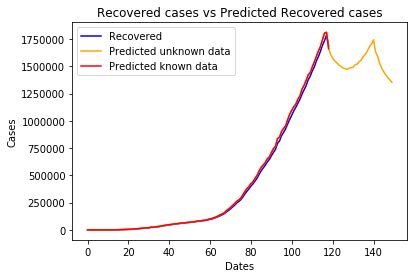

In [21]:
model_sarima_recovered = SARIMAX(np.asanyarray(date_recovered['Recovered']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_recovered = model_sarima_recovered.fit(disp=False, enforce_stationarity=False)
predict_sarima_recovered = model_fit_sarima_recovered.predict(1, len(date_recovered)+31)
print(predict_sarima_recovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_sarima_recovered, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_recovered[:len(predict_sarima_recovered)-31], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()